# Loan Approval Prediction Using Machine Learning Models

# 1. Introduction 
#### In today’s fast-paced financial ecosystem, banks and financial institutions receive thousands of loan applications daily. Assessing these applications manually is time-consuming and can lead to inconsistent decisions. Moreover, loan approval involves multiple factors such as applicant income, credit history, employment status, loan amount, and more—making it a complex process.

#### To address these challenges, this case study explores the use of machine learning algorithms to automate the loan approval process. By leveraging historical data, we aim to build predictive models that can accurately classify whether a loan should be approved or rejected, thereby enhancing operational efficiency and ensuring data-driven decision-making.



# 2. Objectives
#### The main goals of this project are:

#### • To build and compare multiple machine learning models for predicting loan approval outcomes based on applicant information.

#### • To preprocess and prepare real-world loan data for model training, ensuring data quality and consistency.

#### • To evaluate model performance using key metrics such as accuracy, confusion matrix, and classification report.

#### • To identify the best-performing algorithm for deployment in a real-world automated loan assessment system.



# 3. Results
### 3.1 Data Loading and Cleaning


In [152]:
# File path 
loan_pred = pd.read_csv("C:/Users/prati/Downloads/New folder/Machine Leaning data/loan data.csv")
loan_pred.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### First look at the data:
### Training set:

In [21]:
#path for the training set
loan_pred_train = ("C:/Users/prati/Downloads/New folder/Machine Leaning data/loan tain dataset.csv")
#path for the testing set
loan_pred_test = ("C:/Users/prati/Downloads/New folder/Machine Leaning data/loan test dataset.csv")


In [23]:
# read in csv file as a DataFrame
loan_pred_train = pd.read_csv(loan_pred_train)
# explore the first 5 rows
loan_pred_train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Testing Set:


In [28]:
# read in csv file as a DataFrame
loan_pred_test = pd.read_csv(loan_pred_test)
# explore the first 5 rows
loan_pred_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [32]:
#size of each dataset 
print(f"training set (row, col): {loan_pred_train.shape}\n\ntesting set (row, col): {loan_pred_test.shape}")

training set (row, col): (614, 13)

testing set (row, col): (367, 12)


In [35]:
#column information
# Display full info about the DataFrame, including all columns
loan_pred_train.info(verbose=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [38]:
#summary statistics
loan_pred_train.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [41]:
# Drop the 'Loan_ID' column from both datasets
loan_pred_train.drop('Loan_ID', axis=1, inplace=True, errors='ignore')
loan_pred_test.drop('Loan_ID', axis=1, inplace=True, errors='ignore')

# Check the new shapes of both datasets
print(f"Training set (rows, columns): {loan_pred_train.shape}")
print(f"Testing set (rows, columns): {loan_pred_test.shape}")


Training set (rows, columns): (614, 12)
Testing set (rows, columns): (367, 11)


# Missing values 
### As you can see we have some missing data, let's have a look how many we have for each column:


In [47]:
#missing values in decsending order
loan_pred_train.isnull().sum().sort_values(ascending=False)


Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

Each value will be replaced by the most frequent value (mode).

E.G. Credit_History has 50 null values and has 2 unique values 1.0 (475 times) or 0.0 (89 times) therefore each null value will be replaced by the mode 1.0 so now it will show in our data 525 times.

In [52]:
# Filling the missing data
print("Before filling missing values\n\n", "#" * 50, "\n")
null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount', 'Dependents', 'Loan_Amount_Term', 'Gender', 'Married']

for col in null_cols:
    print(f"{col}:\n{loan_pred_train[col].value_counts()}\n", "-" * 50)
    loan_pred_train[col] = loan_pred_train[col].fillna(
        loan_pred_train[col].dropna().mode().values[0]
    )

print("\nAfter filling missing values\n\n", "#" * 50, "\n")
print(loan_pred_train.isnull().sum().sort_values(ascending=False))

for col in null_cols:
    print(f"\n{col}:\n{loan_pred_train[col].value_counts()}\n", "-" * 50)


Before filling missing values

 ################################################## 

Credit_History:
Credit_History
1.0    475
0.0     89
Name: count, dtype: int64
 --------------------------------------------------
Self_Employed:
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
 --------------------------------------------------
LoanAmount:
LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64
 --------------------------------------------------
Dependents:
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
 --------------------------------------------------
Loan_Amount_Term:
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64
 --------------------------------------------------
Gender:
Gender
Male      

# 3.2. Data visalization 
Firstly we need to split our data to categorical and numerical data,

using the .select_dtypes('dtype').columns.to_list() combination.

Loan_Status
Y    422
N    192
Name: count, dtype: int64


C:\Users\prati\AppData\Local\Temp\ipykernel_31104\2829766993.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=cat[-1], palette="Set2")  # Set2 palette for better colors


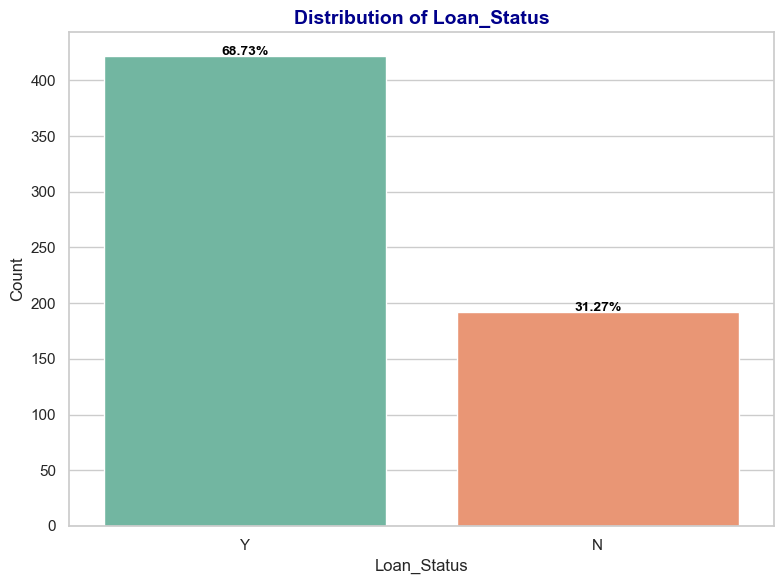

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use correct dataset name
df = loan_pred_train  # Identifier corrected

# List of all columns
all_columns = df.columns.to_list()

# List of numeric columns
num = df.select_dtypes(include='number').columns.to_list()

# List of categorical columns
cat = df.select_dtypes(include='object').columns.to_list()

# Create numeric and categorical DataFrames
loan_num = df[num]
loan_cat = df[cat]

# Print value counts of the last categorical column
print(df[cat[-1]].value_counts())

# Visualization
total = float(len(df[cat[-1]]))
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid", palette="pastel")  # pastel palette for a creative look

ax = sns.countplot(data=df, x=cat[-1], palette="Set2")  # Set2 palette for better colors

# Add percentage labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 1,
        '{:.2f}%'.format(100 * height / total),
        ha="center",
        fontsize=10,
        fontweight='bold',
        color='black'
    )

# Titles and labels
plt.title(f"Distribution of {cat[-1]}", fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel(cat[-1], fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Let's plot our data

### Numeric: 

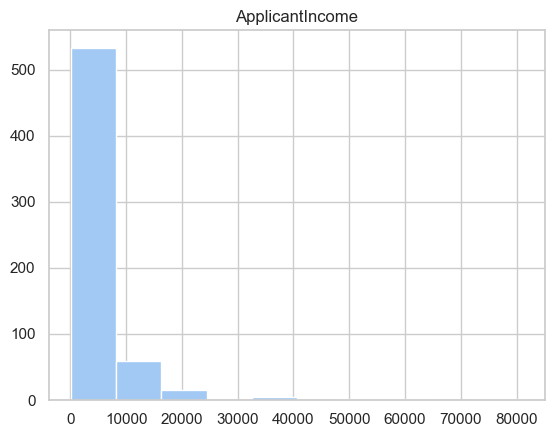

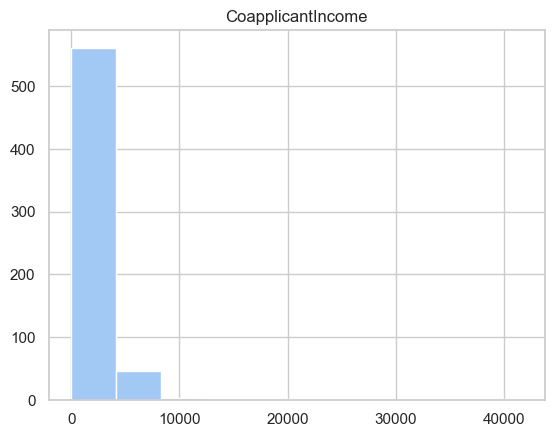

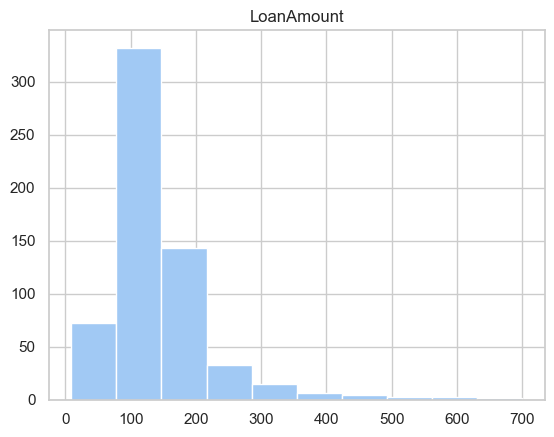

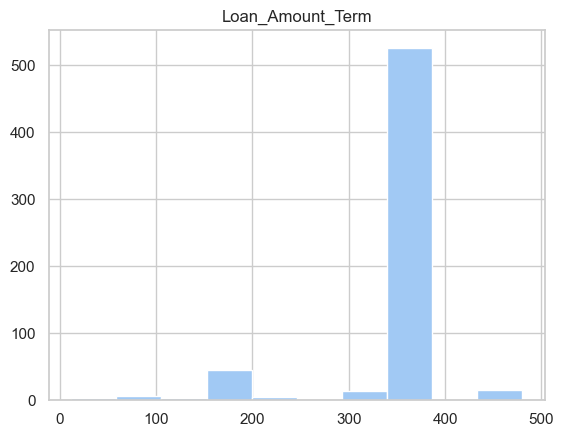

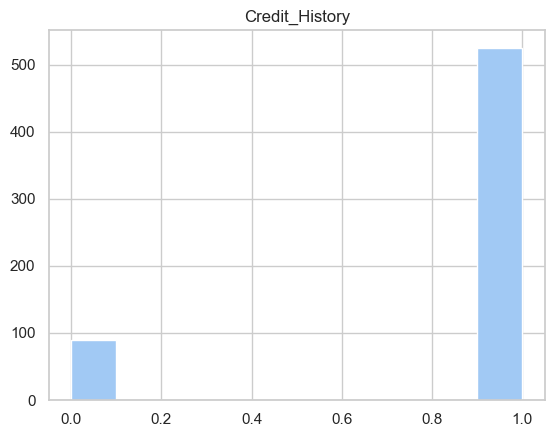

In [67]:
for i in loan_num:
    plt.hist(loan_num[i])
    plt.title(i)
    plt.show()

# Categorical (split by Loan status):

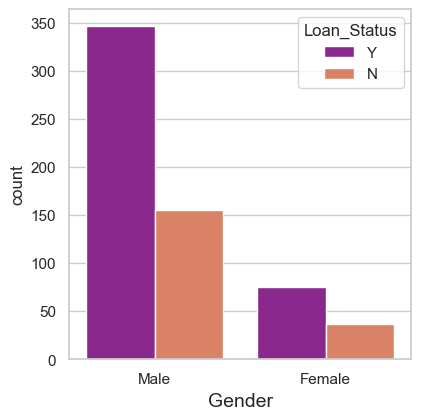

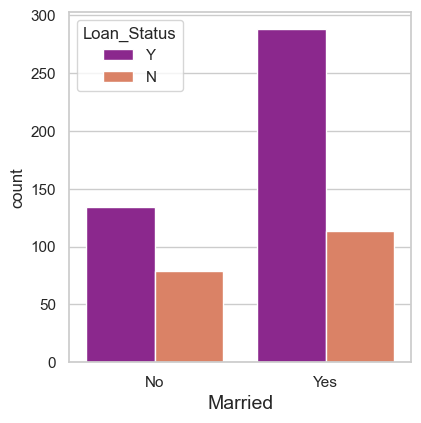

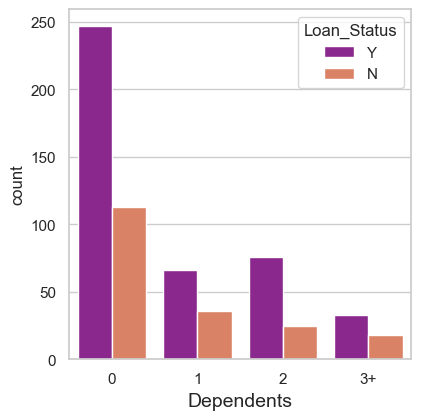

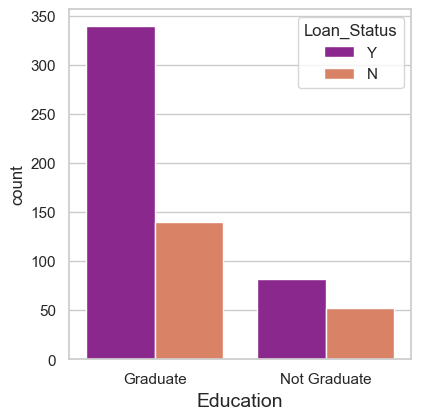

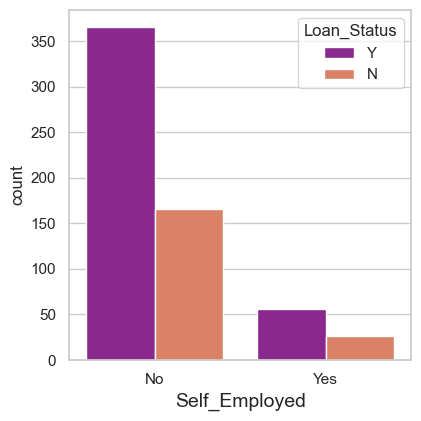

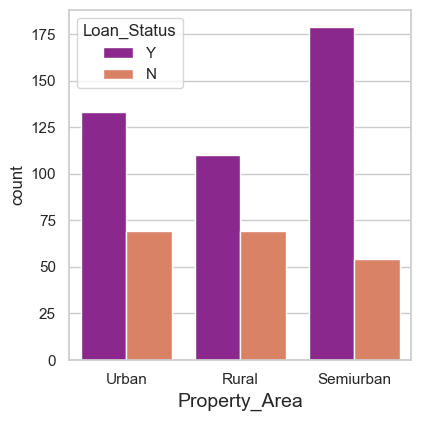

In [75]:
for i in cat[:-1]: 
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue='Loan_Status', data=loan_pred_train,palette='plasma')
    plt.xlabel(i, fontsize=14)

# Encoding data to numeric 

In [81]:
# Mapping categorical values to numeric
to_numeric = {
    'Male': 1, 'Female': 2,
    'Yes': 1, 'No': 2,
    'Graduate': 1, 'Not Graduate': 2,
    'Urban': 3, 'Semiurban': 2, 'Rural': 1,
    'Y': 1, 'N': 0,
    '3+': 3
}

# Apply mapping to both datasets
loan_pred_train = loan_pred_train.applymap(lambda x: to_numeric.get(x, x))
loan_pred_test = loan_pred_test.applymap(lambda x: to_numeric.get(x, x))

# Convert 'Dependents' to numeric and replace the column
loan_pred_train['Dependents'] = pd.to_numeric(loan_pred_train['Dependents'], errors='coerce')
loan_pred_test['Dependents'] = pd.to_numeric(loan_pred_test['Dependents'], errors='coerce')

# Check shape and info
print(f"Training set shape: {loan_pred_train.shape}")
print(f"Testing set shape: {loan_pred_test.shape}\n")

print("Training set info:")
print(loan_pred_train.info())

print("\nTesting set info:")
print(loan_pred_test.info())


Training set shape: (614, 12)
Testing set shape: (367, 11)

Training set info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB
None

Testing set info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 3

C:\Users\prati\AppData\Local\Temp\ipykernel_31104\4099271580.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  loan_pred_train = loan_pred_train.applymap(lambda x: to_numeric.get(x, x))
C:\Users\prati\AppData\Local\Temp\ipykernel_31104\4099271580.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  loan_pred_test = loan_pred_test.applymap(lambda x: to_numeric.get(x, x))


# Correlation matrix

<Axes: >

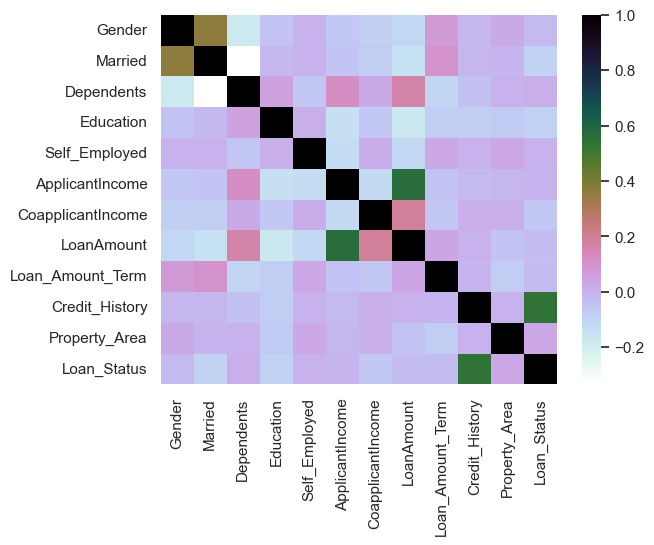

In [86]:
#plotting the correlation matrix
sns.heatmap(loan_pred_train.corr() ,cmap='cubehelix_r')

# Correlation table for a more detailed analysis:




In [92]:
# Correlation table with color gradient and 2 decimal precision
corr = loan_pred_train.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm').format("{:.2f}")



,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.00,0.36,-0.17,-0.05,-0.00,-0.06,-0.08,-0.11,0.07,-0.01,0.03,-0.02
Married,0.36,1.00,-0.33,-0.01,0.00,-0.05,-0.08,-0.15,0.10,-0.01,-0.00,-0.09
Dependents,-0.17,-0.33,1.00,0.06,-0.06,0.12,0.03,0.16,-0.10,-0.04,-0.00,0.01
Education,-0.05,-0.01,0.06,1.00,0.01,-0.14,-0.06,-0.17,-0.07,-0.07,-0.07,-0.09
Self_Employed,-0.00,0.00,-0.06,0.01,1.00,-0.13,0.02,-0.11,0.03,0.00,0.03,0.00
ApplicantIncome,-0.06,-0.05,0.12,-0.14,-0.13,1.00,-0.12,0.56,-0.05,-0.02,-0.01,-0.00
CoapplicantIncome,-0.08,-0.08,0.03,-0.06,0.02,-0.12,1.00,0.19,-0.06,0.01,0.01,-0.06
LoanAmount,-0.11,-0.15,0.16,-0.17,-0.11,0.56,0.19,1.00,0.04,-0.00,-0.05,-0.03
Loan_Amount_Term,0.07,0.10,-0.10,-0.07,0.03,-0.05,-0.06,0.04,1.00,-0.00,-0.08,-0.02
Credit_History,-0.01,-0.01,-0.04,-0.07,0.00,-0.02,0.01,-0.00,-0.00,1.00,0.00,0.54


## We can clearly see that Credit_History has the highest correlation with Loan_Status (a positive correlation of 0.54). Therefore our target value is highly dependant on this column.

# 3.3 Model Building

# Models we will use:
#### 
• Decisin Treee
 #### 
• Random Fores
 ####  
• Logistic Regression

# The Process of Modeling the Data:
#### 1. Importing the model
#### 2. Fitting the model
#### 3. Predicting Loan Status
#### 4. Classification report by Loan Status
#### 5. Overall accuracy


In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [158]:
y = loan_pred_train['Loan_Status']
X = loan_pred_train.drop('Loan_Status', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [107]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

y_predict = DT.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
DT_SC = accuracy_score(y_predict,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.44      0.53      0.48        51
           1       0.80      0.74      0.77       134

    accuracy                           0.68       185
   macro avg       0.62      0.63      0.62       185
weighted avg       0.70      0.68      0.69       185

68.11% Accurate


In [111]:
Decision_Tree=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Decision_Tree.to_csv("Dection Tree.csv")

In [113]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

y_predict = RF.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
RF_SC = accuracy_score(y_predict,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.72      0.45      0.55        51
           1       0.82      0.93      0.87       134

    accuracy                           0.80       185
   macro avg       0.77      0.69      0.71       185
weighted avg       0.79      0.80      0.78       185

80.0% Accurate


In [ ]:
Random_Forest=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Random_Forest.to_csv("Random Forest.csv")     

In [117]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)

y_predict = XGB.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
XGB_SC = accuracy_score(y_predict,y_test)
print(f"{round(XGB_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.73      0.53      0.61        51
           1       0.84      0.93      0.88       134

    accuracy                           0.82       185
   macro avg       0.78      0.73      0.75       185
weighted avg       0.81      0.82      0.81       185

81.62% Accurate


In [122]:
XGBoost=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
XGBoost.to_csv("XGBoost.csv")     

In [124]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

y_predict = LR.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
LR_SC = accuracy_score(y_predict,y_test)
print('accuracy is',accuracy_score(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.92      0.43      0.59        51
           1       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185

accuracy is 0.8324324324324325


C:\Users\prati\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [128]:
Logistic_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Logistic_Regression.to_csv("Logistic Regression.csv")     



In [130]:
score = [DT_SC,RF_SC,XGB_SC,LR_SC]
Models = pd.DataFrame({
    'n_neighbors': ["Decision Tree","Random Forest","XGBoost", "Logistic Regression"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,n_neighbors,Score
3,Logistic Regression,0.832432
2,XGBoost,0.816216
1,Random Forest,0.800000
0,Decision Tree,0.681081


In [5]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


NameError: name 'LogisticRegression' is not defined

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("✅ Accuracy:", round(accuracy, 4))
print("✅ Precision:", round(precision, 4))
print("✅ Recall:", round(recall, 4))

# Optional: Full classification report
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))


# Interpretation
#### • Logistic Regression performed best among all models, achieving an accuracy of ~83.24%. This suggests that the relationship between features and the target variable may be linear or well-structured, which Logistic Regression handles effectively.

#### • XGBoost, a powerful boosting technique, came in second with 81.62% accuracy, showing it can handle more complex patterns but perhaps did not outperform due to either overfitting or hyperparameter tuning issues.

#### • Random Forest achieved 80.00% accuracy, showing decent generalization ability through ensemble learning, but slightly less effective than XGBoost and Logistic Regression in this case.

#### • Decision Tree had the lowest performance at 68.11%, likely due to overfitting on training data and lacking ensemble support to generalize better

# 4. Conclusion

#### This project demonstrated the potential of machine learning in automating and improving the loan approval process. By analyzing real-world loan data and applying various classification algorithms 

Logistic Regression, Decision Tree, Random Forest, and XGBoost—we were able to predict loan approval outcomes with considerable accuracy.

#### Among the models tested, Logistic Regression achieved the highest accuracy (83.24%), indicating that the relationships between applicant features and loan approval status were effectively captured using a linear approach. Ensemble methods like XGBoost and Random Forest also performed well, highlighting their strength in handling complex, non-linear patterns.

# Key takeaways:

#### • Machine learning models can significantly reduce the time and effort required for loan approval decisions.

#### • Proper data preprocessing and feature engineering play a crucial role in boosting model performance.

#### • While accuracy is important, future enhancements should consider additional metrics such as precision, recall, and F1-score, especially in cases of class imbalance.

#### Overall, this project lays a strong foundation for building a reliable, scalable, and automated loan approval system that can assist financial institutions in making faster, more consistent, and data-driven decisions.

#5. Implications
#### The successful implementation of this loan approval prediction system carries significant implications for both financial institutions and their customers:

## 1. Operational Efficiency
#### By automating the decision-making process, banks can drastically reduce the time taken to evaluate loan applications. What once took hours or even days can now be achieved in seconds, allowing institutions to process more applications with fewer resources.

## 2. Data-Driven Decision Making
#### Machine learning eliminates guesswork by basing decisions on patterns learned from historical data. This ensures that loan approvals are objective, consistent, and transparent, reducing the likelihood of human error or bias.

## 3. Enhanced Customer Experience
#### Faster and fairer decisions mean customers don’t have to endure long waiting times or unclear outcomes. A streamlined process builds trust and improves the overall user experience, which is critical in a competitive financial market.

## 4. Risk Management
#### By accurately predicting loan defaults, these models help institutions minimize financial risk. Identifying potentially risky applicants early on allows banks to take preventive measures or offer alternative solutions.

## 5. Scalability and Adaptability
#### The model can be scaled and adapted to different financial institutions with minimal changes, making it a versatile tool. With regular updates and retraining on new data, it can remain relevant and effective over time.

